# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataframe:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

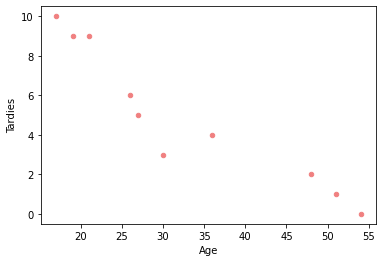

In [2]:
# Your code here.
student_data.plot.scatter(x= 'Age', y= 'Tardies', color = 'lightcoral')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""
There seems to be a negative correlation between the age and the tardiness of students.
As the age  of students increases the tardiness decreases.  
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
#correlation:
print(student_data.corr())

#covariance:
print(student_data.cov())

"""
The correlation allows us to see if there is a relation between the two variables and if is a negative or positive relation.
In this case we have a negative, strong (because it's near -1) relation between the age and the tardiness of students.

A negative covariances indicates that when a variable increases the other decreases.
"""

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [2]:
# Import library
from scipy import stats

x = student_data['Age']    # Independent value
y = student_data['Tardies']       # Dependent value

# Perform a linear regression on the two variables
result = stats.linregress(x,y)
print(result)

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602, intercept_stderr=1.1106388506135372)


Plot your regression model on your scatter plot.

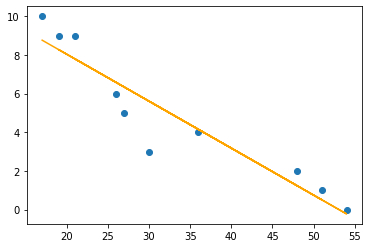

In [10]:
# Regression model
regression_line = result[1] + result[0]*x

plt.plot(x, regression_line, c= 'orange')
plt.scatter(x,y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# By observing the value of variance and the graph itself we can say with some degree of confidence that age is a good predictor of tardiness. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
# Import any libraries you may need & the data
from sklearn import datasets

vehicles = pd.read_csv('/../MODULE_2/lab-regression-analysis/your-code/vehicles.csv')
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
# Create a dataframe with the columns we want:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Do the correlation using spearman of each variable with the outcome:
vehicles[vehicles.columns[0:]].corr(method = 'spearman')['CO2 Emission Grams/Mile'][:-1]

Year                -0.215108
Cylinders            0.788777
Fuel Barrels/Year    0.995539
Combined MPG        -0.995258
Fuel Cost/Year       0.922723
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
# The year is the variable that has the least helpful information

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Define the variables
import statsmodels.api as sm

# Dependent value --> The variable we want to study 
y = vehicles['CO2 Emission Grams/Mile']    
# Independent values --> Variables that might influence the outcome
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  
# Adds a constant term to the predictor
x = sm.add_constant(x)

# Define our model --> perform the fit
# OLS --> Ordinary Least Squares is the simplest and most common estimator in which
# the slope and b(intersection y) are chosen to minimize the square of the distance between the predicted values
# and the actual values.
model = sm.OLS(y,x).fit()
model

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Print your regression summary
model.summary()


# Result:
# co2_e_g = -0.3206*year + 1.8788*Cylinders + 19.0529*F_B/year - 3.0404C_MPG - 3.0404*F_Cost + 769.8883
# As expected, higher values have a bigger impact on the equation,
# so we can say with a 95% degree of confidence that the Fuel Barrels/Year
# is the variable that most impacts the outcome followed by the Combined MPG and that
# the year and Fuel Cost/Year are variables that should not be considered 


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                             15:48:42   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [30]:
# Create the dataframe:
party = pd.DataFrame({'Invites': [1,3,4,6,8,9,11,14], 'Attendance': [1,2,4,4,5,7,8,13]})
party

,Invites,Attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invites', ylabel='Attendance'>

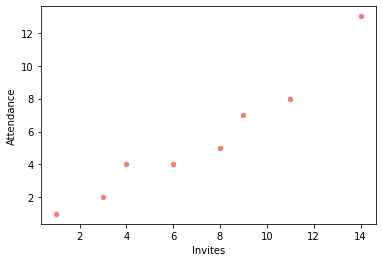

In [26]:
party.plot.scatter(x= 'Invites', y= 'Attendance', color = 'lightcoral')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217, intercept_stderr=0.7592153973608793)


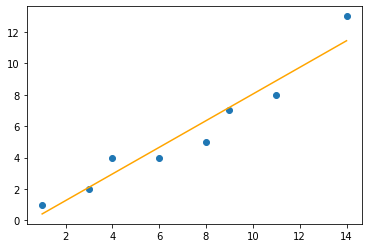

In [28]:

x = party['Invites']    # Independent value
y = party['Attendance']       # Dependent value

# Perform a linear regression on the two variables
result = stats.linregress(x,y)
print(result)

# plot the data
regression_line = result[1] + result[0]*x

plt.plot(x, regression_line, c= 'orange')
plt.scatter(x,y)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292, intercept_stderr=0.5131324183270816)


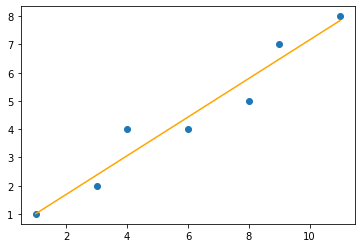

In [34]:
# The last point of our data could be a outlier, 
# since the number of people that are able to attend is close to those invited
# So I will erase it to test the data again
party_w_o = party.drop(labels = 7, axis=0)

x = party_w_o['Invites']    # Independent value
y = party_w_o['Attendance']       # Dependent value

# Perform a linear regression on the two variables
result = stats.linregress(x,y)
print(result)

# plot the data
regression_line = result[1] + result[0]*x

plt.plot(x, regression_line, c= 'orange')
plt.scatter(x,y)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# First result:
# y = 0.8484*x + -0.4393

# Second result:
# y = 0.6842*x + 0.3233

# Based on the first function we can see the slope is higher than in the second one,
# and comparing both r-value we can see that although the values are close, 
# the value for the second dataframe is closer to one
